# Trações e potências

In [1]:
from ZebraLib.zebralib.zebraperformance import Airplane # Só a classe
from ZebraLib.zebralib.zebraperformance import *        # Tudo
from ZebraLib.zebralib import zebraperformance as zp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
Zb = Airplane(S=0.938, Af=0.8, CLmax= 1.523, CLn=1.061)
Zb.C_D0 = 0.16

Zb1 = Airplane(CLn=1.061, CLmax=1.523)
Zb2 = Airplane(CLn=1.061, CLmax=1.523, Load= 6.5)  #Constrói os objetos
Zb3 = Airplane(CLn=1.061, CLmax=1.523, Load= 7.5)
Zb4 = Airplane(CLn=1.061, CLmax=1.523, Load=8.5)

C:\Users\arthu\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\arthu\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


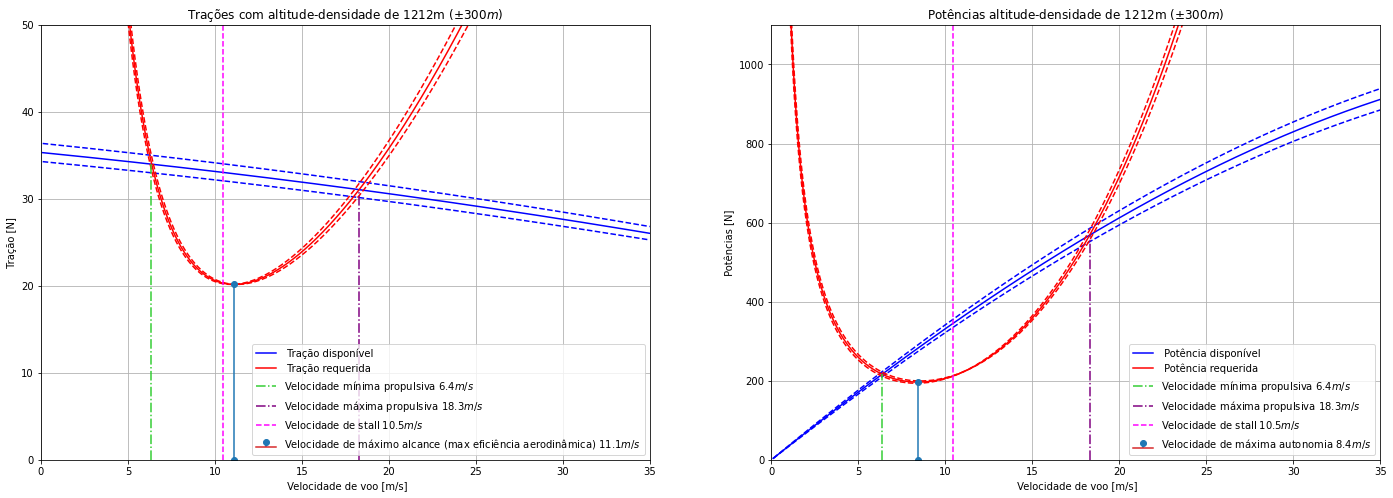

In [3]:
"""
Created on Tue Apr  6 15:37:52 2021

@author: Arthur Chabole
=========================================
Este programa calcula as trações, potências diponíveis e requeridas.

figura 1 - Trações diponível e requeridas
            - Fixo 1212m variando + - 300m
            - Mostrando a velocidade min, max, stall e max alcance.

figura 2 - Potência diponível e requeridas
            - Fixo 1212m variando + - 300m
            - Mostrando a velocidade min, max, stall e max autonomia.
"""

#mais elementos melhor para o método find_match
V = np.linspace(0.1, 35, 1000)
rho = np.array( (1.1212, 1.0886542, 1.05678))
    
Trac_Av0 = Zb.trac_Available(V, rho[0])
Trac_Av1 = Zb.trac_Available(V, rho[1])
Trac_Av2 = Zb.trac_Available(V, rho[2])

Trac_Req0 = Zb.trac_Req(V, rho[0])
Trac_Req1 = Zb.trac_Req(V, rho[1])
Trac_Req2 = Zb.trac_Req(V, rho[2])

pot_Av0 = Zb.pot_Available(V, rho[0])
pot_Av1 = Zb.pot_Available(V, rho[1])
pot_Av2 = Zb.pot_Available(V, rho[2])

pot_Req0 = Zb.pot_Req(V, rho[0])
pot_Req1 = Zb.pot_Req(V, rho[1])
pot_Req2 = Zb.pot_Req(V, rho[2])

# ==========================================     FIGURA 1      ==============================================

fig, ax = plt.subplots(figsize=(24, 8),nrows=1, ncols=2)

ax[0].set(title=f'Trações com altitude-densidade de {round(zp.alt2rho(rho=rho[1]))}m ($\pm 300 m)$', xlabel=' Velocidade de voo [m/s]',
          ylabel=' Tração [N] ')

ax[0].plot(V, Trac_Av0, 'b--')
ax[0].plot(V, Trac_Av1, color= 'b', label= ' Tração disponível ')
ax[0].plot(V, Trac_Av2, 'b--')

ax[0].plot(V, Trac_Req0, 'r--')
ax[0].plot(V, Trac_Req1, color= 'r',label= ' Tração requerida ')
ax[0].plot(V, Trac_Req2, 'r--')

#Maximos e mínimos de velocidade + velocidade de stall e máx efic aerod
#Gambiarra Pensar um jeito mais simples e inteligente de fazer isso
Vmin_index, Vmax_index = zp.find_Match(Zb.trac_Available(V, rho[1]), Zb.trac_Req(V, rho[1]))

ax[0].plot([V[Vmin_index]]*2, [0, Trac_Req1[Vmin_index]] , 
        linestyle='dashdot', color='limegreen', 
        label= f'Velocidade mínima propulsiva ${round(V[Vmin_index],1)}m/s$')

ax[0].plot([V[Vmax_index]]*2,[0, Trac_Req1[Vmax_index]] , 
        linestyle='dashdot', color='purple', 
        label= f'Velocidade máxima propulsiva ${round(V[Vmax_index],1)}m/s$')

ax[0].plot([Zb.Vstall]*2, [0, 50], linestyle='--',
        color='magenta', label= f'Velocidade de stall ${round(Zb.Vstall,1)}m/s$')

Maxalc_index = np.where(Trac_Req1 == min(Trac_Req1))

ax[0].stem([V[Maxalc_index]]*2, [0, Trac_Req1[Maxalc_index]], 
        label=f'Velocidade de máximo alcance (max eficiência aerodinâmica) ${round(min(V[Maxalc_index]),1)}m/s$') 
 
ax[0].set_ylim(0,50)
ax[0].set_xlim(0,35)

ax[0].legend()
ax[0].grid()

# =====================================     FIGURA 2      ==============================================

#fig, ax2 = plt.subplots()

ax[1].set(title=f'Potências altitude-densidade de {round(zp.alt2rho(rho=rho[1]))}m ($\pm 300 m)$', xlabel=' Velocidade de voo [m/s]',
          ylabel=' Potências [N] ')

ax[1].plot(V, pot_Av0, 'b--')
ax[1].plot(V, pot_Av1, color= 'b', label= ' Potência disponível ')
ax[1].plot(V, pot_Av2, 'b--')

ax[1].plot(V, pot_Req0, 'r--')
ax[1].plot(V, pot_Req1, color= 'r',label= ' Potência requerida ')
ax[1].plot(V, pot_Req2, 'r--')

ax[1].plot([V[Vmin_index]]*2,[0, pot_Req1[Vmin_index]] , 
        linestyle='dashdot', color='limegreen', 
        label= f'Velocidade mínima propulsiva ${round(V[Vmin_index],1)}m/s$')

ax[1].plot([V[Vmax_index]]*2, [0, pot_Req1[Vmax_index]] , 
        linestyle='dashdot', color='purple',
        label= f'Velocidade máxima propulsiva ${round(V[Vmax_index],1)}m/s$')

ax[1].plot([Zb.Vstall]*2, [0, 1100], linestyle='--', color='magenta', label= f'Velocidade de stall ${round(Zb.Vstall,1)}m/s$')

MaxAuto_index = np.where(pot_Req1 == min(pot_Req1))

ax[1].stem([V[MaxAuto_index]]*2, [0, pot_Req1[MaxAuto_index]], 
        label=f'Velocidade de máxima autonomia ${round(min(V[MaxAuto_index]),1)}m/s$') 
 
ax[1].set_ylim(0,1100)
ax[1].set_xlim(0,35)

ax[1].legend()
ax[1].grid()

# Decolagem

## Dinâmica e cinemática


Verificar a acuracidade disso! PROBLEMA
Fazer um gráfico separado para o atrito ???

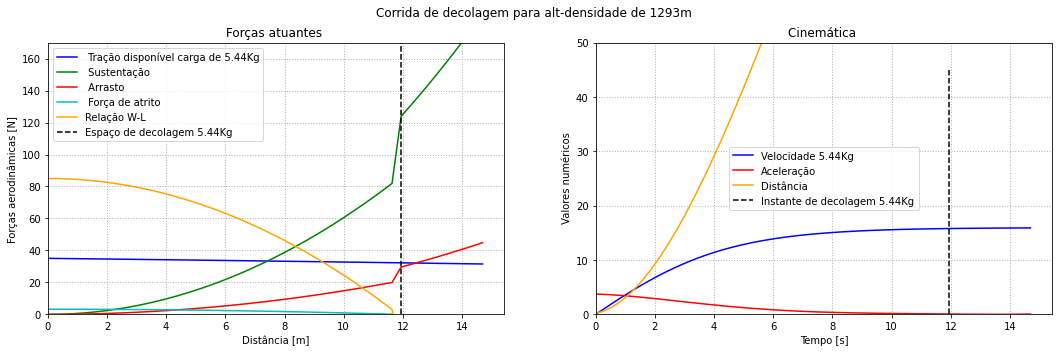

In [4]:
"""
Created on Thu Mar 25 11:46:23 2021

@author: Arthur Chabole
=============================
Este programa cálcula a forças e a cinemática da decolagem para alt-dens 1212m usando a biblioteca zerbralib. 
   
 Figura 1 - Aplicando newton na decolagem para 2 cargas pagas diferentes
        Subplot 1 - Forças durante a decolagem x distância de pista
        Subplot 2 - Velocidade, aceleração e distância x Tempo
        
PROBLEMA
    - Espaço de decolagem ..... 
"""
Dens = 1.08   #Densidade do ar

#Metodos para dinamica de de colagem
Vlo_index, V, T, L, D, Fat = Zb.takeOff_Forces(Dens)

# Métodos para cinemática de decolagem
t, d, V, a = Zb.takeOff_Kinematic_EDO(rho=Dens)

#PLOTAGEM
fig, ax = plt.subplots(figsize=(18, 5),nrows=1, ncols=2)
fig.suptitle(f'Corrida de decolagem para alt-densidade de {round(zp.alt2rho(rho=Dens))}m')

#CONSTRUINDO O 1 SUBGRÁFICO   
ax[0].set(title= 'Forças atuantes ', xlabel='Distância [m]',ylabel='Forças aerodinâmicas [N]')
     
#Plotando os dados para o avião Zb1
ax[0].plot(t, T, color='b', label = f' Tração disponível carga de {Zb.Load}Kg')
ax[0].plot(t, L, color= 'g',label = ' Sustentação')
ax[0].plot(t, D, color='r',label = ' Arrasto')
ax[0].plot(t, Fat, color='c', label = ' Força de atrito ')
ax[0].plot(t, Fat/Zb.mi, color='orange' , label = 'Relação W-L ') #Gambiarra para poupar trabalho "Fat/Zb.mi"

ax[0].plot([t[Vlo_index]]*2, [0,250], '--', color='black' , label = f'Espaço de decolagem {Zb.Load}Kg')

ax[0].set_ylim(0, 170)
ax[0].set_xlim(0)
ax[0].legend()
ax[0].grid(linestyle='dotted', linewidth=1)

#CONSTRUINDO O 2 SUBGRÁFICO
ax[1].set(title= 'Cinemática ',xlabel='Tempo [s]', ylabel=' Valores numéricos')

#Plotando os dados para o avião Zb1
ax[1].plot(t, V, color='b', label = f'Velocidade {Zb.Load}Kg')
ax[1].plot(t, a, color='r', label = 'Aceleração')
ax[1].plot(t, d, color='orange', label = 'Distância')

ax[1].plot([t[Vlo_index]]*2, [0,45], '--', color='black' , label = f'Instante de decolagem {Zb.Load}Kg')

ax[1].set_ylim(0, 50)
ax[1].set_xlim(0)

ax[1].legend()
ax[1].grid(linestyle='dotted', linewidth=1)

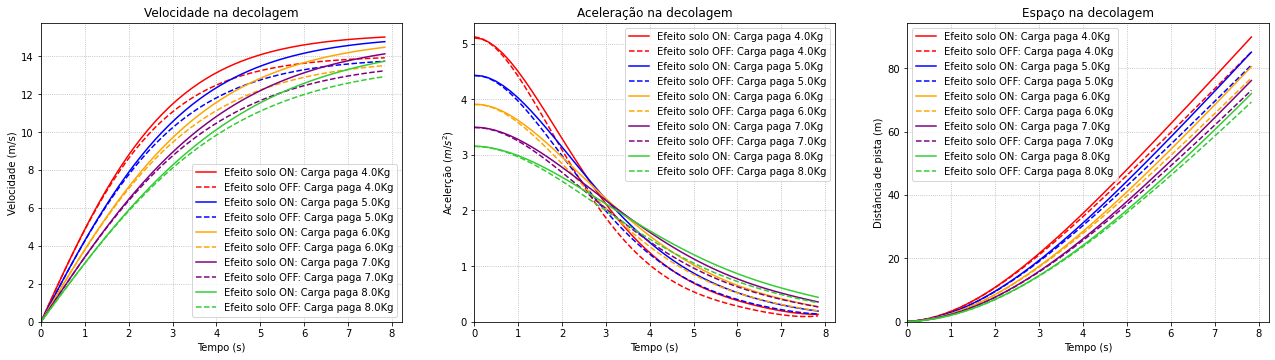

In [5]:
"""
Created on Sat Jun  5 09:09:02 2021

@author: Arthur Chabole
=============================
Performance cinemática da decolagem.

"""

# Definindo domínio
t_final = 8
pesos = np.linspace(4, 9, 6)

# Colores e marcadores (beautilfy)
Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen'))
Markers = np.array(('^', 'o', 'd', 'v', '.'))
Lines = np.array(('--', '-', '--', '--'))

# Gráficos
fig, ax = plt.subplots(figsize=(22, 5.5),nrows=1, ncols=3)
'''fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
fig, ax4 = plt.subplots()'''

ax[0].set(title='Velocidade na decolagem',
       xlabel='Tempo (s)', ylabel='Velocidade (m/s)')
ax[1].set(title='Aceleração na decolagem',
        xlabel='Tempo (s)', ylabel='Acelerção $(m/s^2)$')
ax[2].set(title='Espaço na decolagem', xlabel='Tempo (s)',
        ylabel='Distância de pista (m)')

'''ax4.set(title='Espaço na decolagem',
        xlabel='Tempo (s)', ylabel='Valores numéricos')'''

for (p, cor, mark) in zip(pesos, Cores, Markers):
    Zb = Airplane(Load=p)
    Zb.C_D0 = 0.2

    # Usando os métodos
    tempo, S_on, V_on, a_on = Zb.takeOff_Kinematic_EDO(
        t_final, Ground_Effect=True)
    tempo, S_off, V_off, a_off = Zb.takeOff_Kinematic_EDO(t_final)

    #Vlo_index = get_index_of_nearest_element(V_off, Zb.veloc_Req(Zb.CLmax)*1.2)

    ax[0].plot(tempo, V_on, color=cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax[0].plot(tempo, V_off, '--', color=cor,
            label=f'Efeito solo OFF: Carga paga {p}Kg')
    #ax.axvline(x=tempo[Vlo_index], ymin= 0, ymax= 20, color= cor)

    ax[1].plot(tempo, a_on, color=cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax[1].plot(tempo, a_off, '--', color=cor,
             label=f'Efeito solo OFF: Carga paga {p}Kg')
    #ax2.axvline(x=tempo[Vlo_index], ymin=0, ymax= 8, color= cor)

    ax[2].plot(tempo, S_on, color=cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax[2].plot(tempo, S_off, '--', color=cor,
             label=f'Efeito solo OFF: Carga paga {p}Kg')
    #ax3.axvline(x=tempo[Vlo_index], ymin= 0, ymax= 50, color= cor)

    '''ax4.plot(tempo, V_off, '--',  marker=Markers[0],
             color=cor, label=f'Velocidade, Efeito solo OFF: Carga paga {p}Kg')
    ax4.plot(tempo, a_off, '--',  marker=Markers[1],
             color=cor, label=f'Aceleração, Efeito solo OFF: Carga paga {p}Kg')
    ax4.plot(tempo, S_off, '--',  marker=Markers[2],
             color=cor, label=f'Distânica, Efeito solo OFF: Carga paga {p}Kg')'''

# Formatar gráfico 4 para escala logaritmica
# ax4.set_yscale('log')
# ax4.set_ylim(0.1)

# Beautilfy
for graf in ax:
    graf.legend()
    graf.set_xlim(0)
    graf.set_ylim(0)
    graf.grid(linestyle='dotted')
plt.show()

## Performance de decolagem - Alt-Dens x Distância

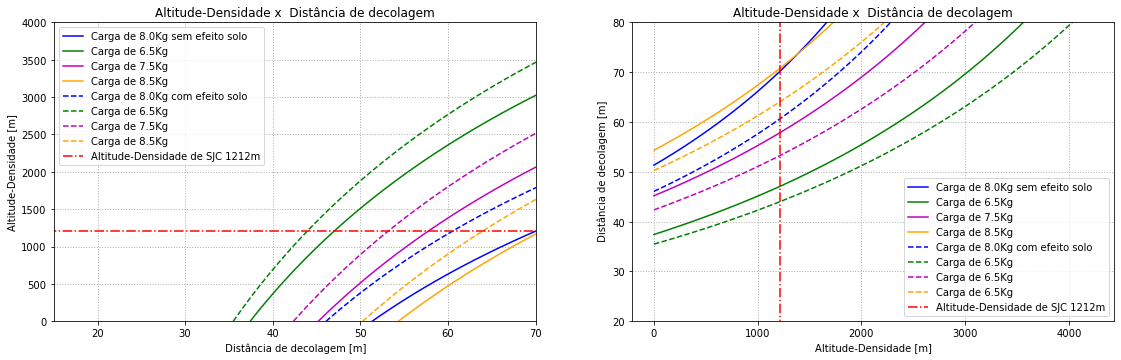

In [6]:
'''
Este programa calcula o comprimento de pista para decolagem x altitude-densidade para varias cargas pagas
                                                                            usando a biblioteca zebralib.    
    Figura 1 - Altitude-densidade x Distância de pista
            Com cargas diferentes.
      
    Figura 2 - Distância de pista x Altitude-densidade 
            Com cargas diferentes.
            
O efeito solo pode ser considerado ou não. Caso seja considerado, "descomente" as linhas 60-63 e 84-87
'''

Densidade = np.linspace(1.225, 0.8) 
AltDens = zp.iterate_rho2alt(Densidade)

# Sem considerar o efeito solo 'False'
Slo =  np.array(Zb.takeOff_Distance_AproxAnderson(Densidade, False))
Slo2 = np.array(Zb2.takeOff_Distance_AproxAnderson(Densidade, False))
Slo3 = np.array(Zb3.takeOff_Distance_AproxAnderson(Densidade, False))
Slo4 = np.array(Zb4.takeOff_Distance_AproxAnderson(Densidade, False))

# Considerando o efeito solo do avião 'True'
S =  np.array(Zb.takeOff_Distance_AproxAnderson(Densidade, True))
S2 = np.array(Zb2.takeOff_Distance_AproxAnderson(Densidade, True))
S3 = np.array(Zb3.takeOff_Distance_AproxAnderson(Densidade, True))
S4 = np.array(Zb4.takeOff_Distance_AproxAnderson(Densidade, True))

#PLOTAGEM
fig, ax = plt.subplots(figsize=(19, 5.5),nrows=1, ncols=2)
#fig, ax2 = plt.subplots()

#INSPIRADO NA AIRBUS
ax[0].set(title='Altitude-Densidade x  Distância de decolagem', xlabel=' Distância de decolagem [m]',
          ylabel='Altitude-Densidade [m]', label=' - Sem efeito solo e -- com efeito solo')

# Sem considerar o efeito solo 'False'
ax[0].plot(Slo, AltDens, color= 'b',  label= f'Carga de {round(Zb.Load,2)}Kg sem efeito solo' )
ax[0].plot(Slo2, AltDens, color='g', label= f'Carga de {round(Zb2.Load,2)}Kg')
ax[0].plot(Slo3, AltDens, color= 'm', label= f'Carga de {round(Zb3.Load,2)}Kg ')
ax[0].plot(Slo4, AltDens, color= 'orange', label= f'Carga de {round(Zb4.Load,2)}Kg')

# Considerando o efeito solo do avião 'True'
ax[0].plot(S, AltDens, '--', color= 'b', label= f'Carga de {round(Zb.Load,2)}Kg com efeito solo' )
ax[0].plot(S2, AltDens, '--', color= 'g', label= f'Carga de {round(Zb2.Load,2)}Kg ')
ax[0].plot(S3, AltDens, '--', color= 'm', label= f'Carga de {round(Zb3.Load,2)}Kg ')
ax[0].plot(S4, AltDens, '--', color= 'orange', label= f'Carga de {round(Zb4.Load,2)}Kg ')

ax[0].plot([-5,180], [1212]*2,  linestyle='dashdot', color= 'r', label= 'Altitude-Densidade de SJC 1212m' )

ax[0].set_ylim(0, 4000)
ax[0].set_xlim(15,70)

ax[0].legend()
ax[0].grid(linestyle='dotted', linewidth=1)

#INSPIRADO NA EMBRAER
ax[1].set(title='Altitude-Densidade x  Distância de decolagem', ylabel=' Distância de decolagem [m]',
          xlabel='Altitude-Densidade [m]')

# Sem considerar o efeito solo 'False'
ax[1].plot(AltDens, Slo, color= 'b', label= f'Carga de {round(Zb.Load,2)}Kg sem efeito solo')
ax[1].plot(AltDens, Slo2, color= 'g', label= f'Carga de {round(Zb2.Load,2)}Kg')
ax[1].plot(AltDens, Slo3, color= 'm', label= f'Carga de {round(Zb3.Load,2)}Kg')
ax[1].plot(AltDens, Slo4, color= 'orange', label= f'Carga de {round(Zb4.Load,2)}Kg')

# Considerando o efeito solo do avião 'True'
ax[1].plot(AltDens, S , '--', color= 'b', label= f'Carga de {round(Zb.Load,2)}Kg com efeito solo')
ax[1].plot(AltDens, S2, '--', color= 'g', label= f'Carga de {round(Zb2.Load,2)}Kg')
ax[1].plot(AltDens, S3,  '--', color= 'm', label= f'Carga de {round(Zb2.Load,2)}Kg')
ax[1].plot(AltDens, S4, '--', color= 'orange', label= f'Carga de {round(Zb2.Load,2)}Kg')

ax[1].plot([1212]*2, [0,280], linestyle='dashdot', color= 'r', label= 'Altitude-Densidade de SJC 1212m' )

ax[1].set_ylim(20,80)

ax[1].legend()
ax[1].grid(linestyle='dotted', linewidth=1)
plt.show()

## Performance de decolagem: MTOW x distância de decolagem

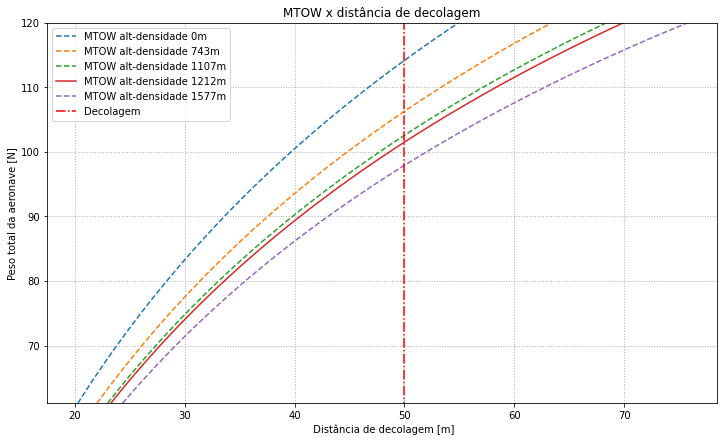

In [7]:
"""
Created on Thu Feb  4 18:42:36 2021

@author: Arthur Chabole
===============================
Este programa calcula o MTOW x comprimento de pista para varias alt-dens usando a biblioteca zebralib.
                                                                                
    Figura 1 - Peso total (MTOW) x Distância de pista
            Com alt-dens diferentes.
      
    Figura 2 - Distância de pista x Peso total (MTOW)
            Com alt-dens diferentes.
            
O efeito solo pode ser considerado ou não. Caso seja considerado, coloque "True" linhas 30-34
"""

g= 9.81
Cargas = np.linspace(3, 9)

# Chamando a função da biblioteca de desemenho pelo nome apelido zp
Slo, W = zp.takeOff_Distance_x_PayLoad(Zb, Cargas, 1.22475, False)
Slo2, W2 = zp.takeOff_Distance_x_PayLoad(Zb,Cargas, 1.14, False)
Slo3, W3 = zp.takeOff_Distance_x_PayLoad(Zb, Cargas, 1.10, False)
Slo4, W4 = zp.takeOff_Distance_x_PayLoad(Zb, Cargas, 1.08865, False)
Slo5, W5 = zp.takeOff_Distance_x_PayLoad(Zb, Cargas, 1.05, False)

#2x PLOTAGENS
fig, ax = plt.subplots(figsize=(12, 7))
#fig, ax2 = plt.subplots()

#INSPIRADO NA AIRBUS
ax.set(title='MTOW x distância de decolagem', xlabel=' Distância de decolagem [m]',
          ylabel='Peso total da aeronave [N]')

ax.plot(Slo,W, '--',  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.224975))}m')
ax.plot(Slo2,W, '--', label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.14))}m')
ax.plot(Slo3,W, '--', label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.1))}m')
ax.plot(Slo4,W, label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.08865))}m')
ax.plot(Slo5,W, '--',  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.05))}m')
ax.plot([50]*2, [0,150],  linestyle='dashdot', color='r', label= 'Decolagem')

ax.set_ylim(W[0],120)

ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

# #INSPIRADO NA BOING
# ax2.set(title='MTOW x distância de decolagem', ylabel=' Distância de decolagem [m]',
#           xlabel='Peso total da aeronave [N]')

# ax2.plot(W, Slo, '--',  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.224975))}m')
# ax2.plot(W, Slo2, '--', label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.14))}m')
# ax2.plot(W, Slo3, '--', label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.1))}m')
# ax2.plot(W, Slo4,  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.08865))}m')
# ax2.plot(W, Slo5, '--',  label= f'MTOW alt-densidade {round(zp.alt2rho(rho=1.05))}m')
# ax2.plot([W[0],100],[50]*2 , linestyle='dashdot', color='r', label= 'Decolagem')

# ax2.set_xlim(W[0],100)

# ax2.legend()
# ax.grid(linestyle='dotted', linewidth=1)



# Subida


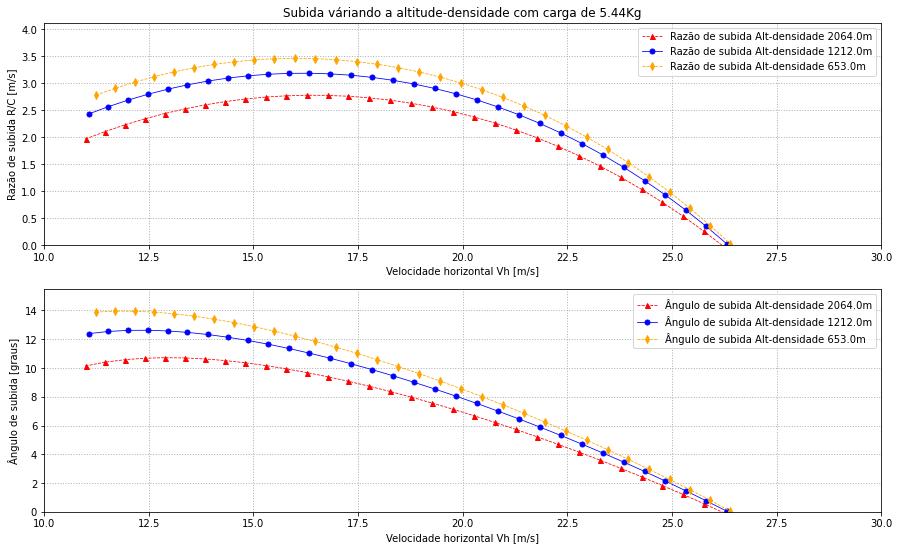

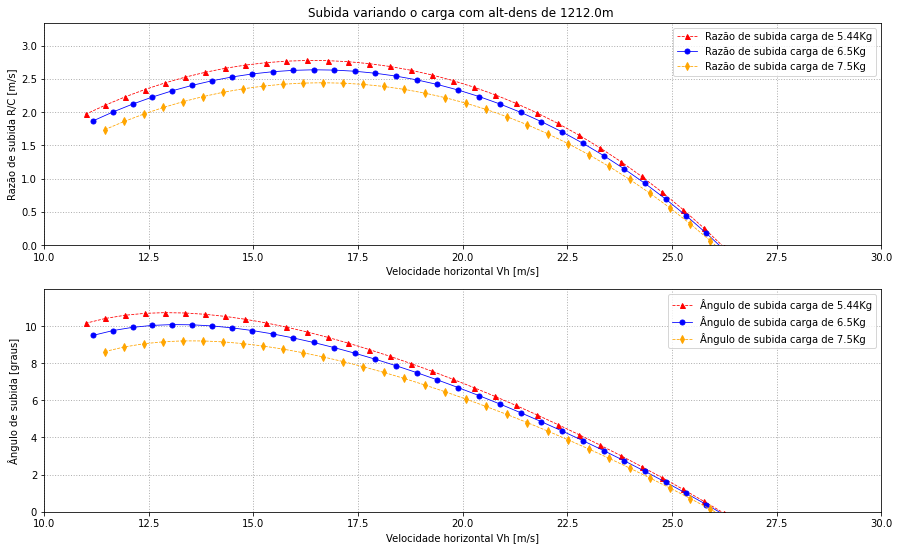

In [8]:
"""
Created on Fri Apr  2 22:48:14 2021

@author: Arthur Chabole
=============================
Este programa cálcula a razão e ângulo de subida x velocidade horizontal Vh usando a biblioteca zerbralib. 
   
 Figura 1 - Fixo a carga padrão de 5.44kg
        Subplot 1 - Razão de subida x Vh variando altitude-densidade
        Subplot 2 - Ângulo de subida x Vh variando altitude-densidade
   
 Figura 2 - Fixo a altitude-densidade de 1212m
        Subplot 1 - Razão de subida x Vh variando carga paga
        Subplot 2 - Ângulo de subida x Vh variando carga paga
        
"""
V = np.linspace(0, 35)
Zbs = np.array((Zb1, Zb2, Zb3))  #Array de objetos

Densidade = [1, 1.0887, 1.15, 1.224978]

Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen' ))
Markers= np.array(('^', 'o', 'd', 'v', '.'))
Lines = np.array(('--','-','--','--'))


# ===================================              FIGURA 1        ========================================

#SUBIDA VARIANDO A ALTITUDE-DENSIDADE USANDO 5.44kg CARGA PAGA
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,9))            #Constrói a figura com os subplots

#SUBGRÁFICO 1 DA FIGURA 1
ax.set(title= f'Subida váriando a altitude-densidade com carga de {Zb1.Load}Kg', xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Razão de subida R/C [m/s]')

#SUBGRÁFICO 2 DA FIGURA 1
ax2.set(xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Ângulo de subida [graus]')

for (dens, cor, mark, line, zb) in zip(Densidade, Cores, Markers, Lines, Zbs):
   
    V = np.linspace(zb.veloc_Req(zb.CLmax, rho=dens),35)
    RC, theta = Zb1.rate_Climb(V, dens)          #Cálcula as razões e os ângulos
    Vh = np.array(np.cos(np.deg2rad(theta))*V)   #Cálcula a velocidade horizontal
    
    ax.plot(Vh, RC, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8, 
            label= f'Razão de subida Alt-densidade {round(zp.alt2rho(rho= dens),0)}m' )
    ax2.plot(Vh, theta, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8,
             label= f'Ângulo de subida Alt-densidade {round(zp.alt2rho(rho= dens),0)}m' )

ax.set_ylim(0)
ax.set_xlim(10, 30)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

ax2.set_ylim(0)
ax2.set_xlim(10, 30)
ax2.legend()
ax2.grid(linestyle='dotted', linewidth=1)

# ===================================             FIGURA 2           ==========================================

#SUBIDA VARIANDO A ALTITUDE-DENSIDADE USANDO 5.44kg CARGA PAGA
fig, (ax, ax2) = plt.subplots(2,1, figsize=(15,9))            #Constrói a figura com os subplots

#SUBGRÁFICO 1 DA FIGURA 1
ax.set(title= f'Subida variando o carga com alt-dens de {round(zp.alt2rho(rho= Densidade[1]),0)}m ',
        xlabel='Velocidade horizontal Vh [m/s]', ylabel='Razão de subida R/C [m/s]')

#SUBGRÁFICO 2 DA FIGURA 1
ax2.set(xlabel='Velocidade horizontal Vh [m/s]',
        ylabel='Ângulo de subida [graus]')

for (dens, cor, mark, line, zb) in zip(Densidade, Cores, Markers, Lines, Zbs):
    
    V = np.linspace(zb.veloc_Req(zb.CLmax, rho=dens),35)
    RC, theta = zb.rate_Climb(V, dens)          #Cálcula as razões e os ângulos
    Vh = np.array(np.cos(np.deg2rad(theta))*V)  #Cálcula a velocidade horizontal
    
    ax.plot(Vh, RC, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8, 
             label= f'Razão de subida carga de {(zb.Load)}Kg' )
    ax2.plot(Vh, theta, color=cor, marker=mark, linestyle=line, markersize=5, linewidth=0.8,
             label= f'Ângulo de subida carga de {(zb.Load)}Kg' )

ax.set_ylim(0)
ax.set_xlim(10, 30)
ax.legend()
ax.grid(linestyle='dotted', linewidth=1)

ax2.set_ylim(0)
ax2.set_xlim(10, 30)
ax2.legend()
ax2.grid(linestyle='dotted', linewidth=1)

## Cruzeiro

## Manobra

C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1123: RuntimeWarning: invalid value encountered in sqrt
  N = (A * (B - C)) ** 0.5
C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1215: RuntimeWarning: invalid value encountered in sqrt
  R = V ** 2 / (g * (n ** 2 - 1) ** 0.5)
C:\Users\arthu\Anaconda3\ZebraLib\zebralib\zebraperformance.py:1278: RuntimeWarning: invalid value encountered in sqrt
  w = (g * (((n ** 2) - 1) ** 0.5)) / V


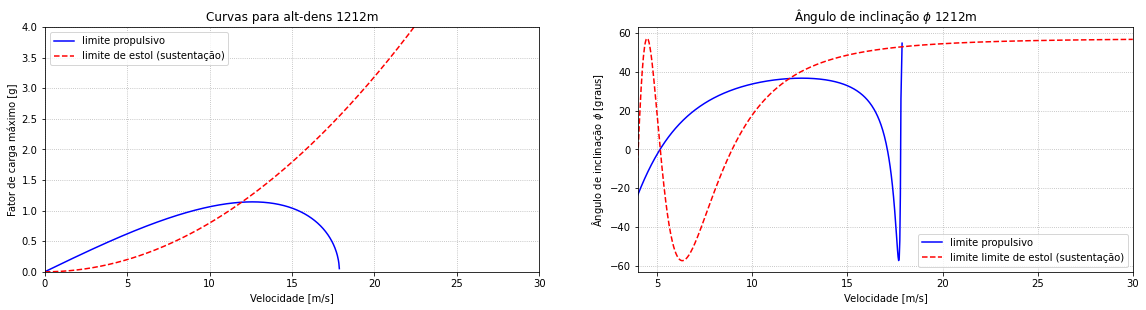

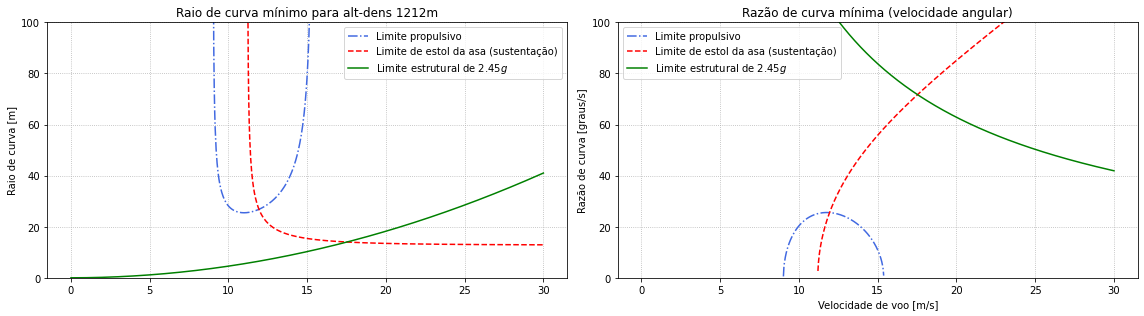

In [9]:
"""
Created on Sun Apr  4 22:57:59 2021

@author: Arthur Chabole
====================================
Este programa calcula Fatores de carga e os angulos de inclinação phi, figura 1. E raios e razões de curvas
limitados pela potência, sustentação e estrutura do avião, figura 2. Fixados carga padrão e alt-dens 1212m
Basicamente a ideia é entender o que limita o avião na execução das curvas.

 Figura 1 - Fixo carga padrão e altitude-densidade de 1212m 
        Subplot 1 - Fator de carga x velocidade de voo
        Subplot 2 - Ângulo de inclianação x Velocidade de voo
   
 Figura 2 - Fixo carga padrão e altitude-densidade de 1212m 
        Subplot 1 - Raio de curva x velocidade de voo
        Subplot 2 - Razão de curva x velocidade de voo

"""

V = np.linspace(0.01, 30, 1000)
dens = 1.0887   # Densidade do ar

Np, phip = Zb.turn_Nprop(V, dens)  # Cálculo dos fatores de carga
Ns, phis= Zb.turn_Nsust(V, dens)

#=========================================       FIGURA 1           ==================================

fig, ax = plt.subplots(figsize=(19.5, 4.5),nrows=1, ncols=2)

#SUBPLOT 1
#Fator de carga durante as curvas
ax[0].set(title=f'Curvas para alt-dens {round(zp.alt2rho(rho=dens))}m',
       xlabel='Velocidade [m/s]', ylabel='Fator de carga máximo [g]')

ax[0].plot(V, Np, color='b', label='limite propulsivo')
ax[0].plot(V, Ns,'--',  color='red', label='limite de estol (sustentação)')

#ax[0].axvline(x=15, ls='-', c='r')

ax[0].set_xlim(0, 30)
ax[0].set_ylim(0, 4)
ax[0].grid(linestyle='dotted')
ax[0].legend()

#SUBPLOT 2
#Inclinação das asas durante a curva 'phi' 
ax[1].set(title= r'Ângulo de inclinação $\phi$ ' + f'{round(zp.alt2rho(rho=dens))}m',
       xlabel='Velocidade [m/s]', ylabel='Fator de carga máximo [g]')

ax[1].set(ylabel=r'Ângulo de inclinação $\phi$ [graus]', xlabel='Velocidade [m/s]')
ax[1].plot(V, phip, color='b', label='limite propulsivo')
ax[1].plot(V, phis,'--', color='red', label='limite limite de estol (sustentação)')

ax[1].set_xlim(4, 30)
ax[1].grid(linestyle='dotted')
ax[1].legend()

#=========================================       FIGURA 2            ==================================

#Raio de curva
Rp = Zb.turn_Radius(V, Np)          #Limite propulsivo
Rs = Zb.turn_Radius(V, Ns)          #Limite pelo estol da asa (CL)
Rstr = Zb.turn_Radius(V, Zb.Nmax)   #Limite estrutural de Nmáx 

#Razão de curva
Wp = Zb.turn_Rate(V, Np)            #Limite propulsivo
Ws = Zb.turn_Rate(V, Ns)            #Limite pelo estol da asa (CL)
Wstr = Zb.turn_Rate(V, Zb.Nmax)     #Limite estrutural de Nmáx 

fig, ax = plt.subplots(figsize=(16, 4.5),nrows=1, ncols=2) 

#SUBPLOT 1
#Raio de curva 
ax[0].set(title=f'Raio de curva mínimo para alt-dens {round(zp.alt2rho(rho=dens))}m', 
       ylabel='Raio de curva [m]')

ax[0].plot(V, Rp, linestyle='dashdot', color='royalblue', label='Limite propulsivo')
ax[0].plot(V, Rs, '--', color='red', label='Limite de estol da asa (sustentação)')
ax[0].plot(V, Rstr, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax[0].set_ylim(0, 100)
ax[0].grid(linestyle='dotted')
ax[0].legend()

#SUBPLOT 2
#Razão de curva
ax[1].set(title='Razão de curva mínima (velocidade angular)',ylabel='Razão de curva [graus/s]'
       , xlabel='Velocidade de voo [m/s]')

ax[1].plot(V, Wp, linestyle='dashdot', color='royalblue', label='Limite propulsivo')
ax[1].plot(V, Ws, '--', color='red', label='Limite de estol da asa (sustentação)')
ax[1].plot(V, Wstr, color='green', label=f'Limite estrutural de ${Zb.Nmax}g$')

ax[1].set_ylim(0, 100)
ax[1].grid(linestyle='dotted')
ax[1].legend()

plt.tight_layout()

## Descida

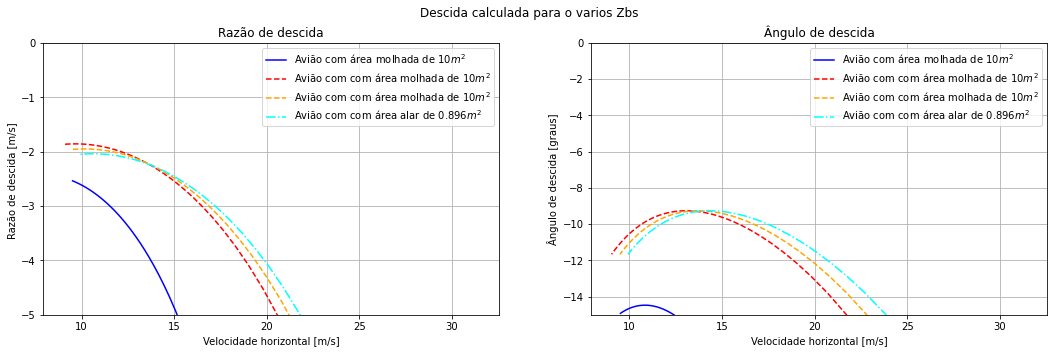

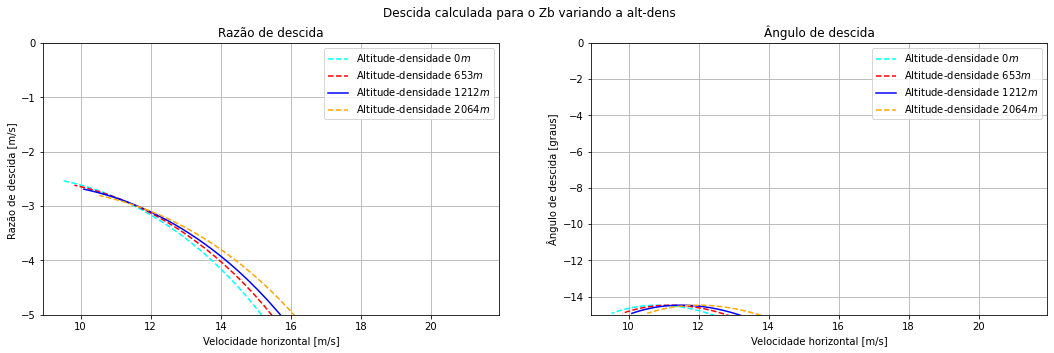

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  4 09:04:08 2021

@author: Arthur Chabole
====================================
Este programa calcula a razão e ângulo de descida para diferentes configurações de área molhada e alt-dens.

 Figura 1 - Fixo altitude densidade de 1212m e variando setups dos aviões
        Subplot 1 - Razão de decida x velocidade horizontal
        Subplot 2 - Ângulo de descida x Velocidade horizontal
   
 Figura 2 - Fixo o avião Zb e variando alt-dens
        Subplot 1 - Razão de descida x velocidade horizontal
        Subplot 2 - Ângulo de descida x velocidade horizontal

"""

Cl = np.linspace(0.1,2)

# =======================================        FIGURA 1      ======================================

theta, RS, Vh = Zb.sink_Rate(Cl)
theta2, RS2, Vh2 = Zb2.sink_Rate(Cl)
theta3, RS3, Vh3 = Zb3.sink_Rate(Cl)         #Calculando o método para todos
theta4, RS4, Vh4 = Zb4.sink_Rate(Cl)

#PLOTAGEM SUBPLOT 1 FIGURA 1
fig, (ax, ax2) = plt.subplots(figsize=(18, 5),nrows=1, ncols=2)
fig.suptitle('Descida calculada para o varios Zbs')

ax.set(title='Razão de descida', xlabel='Velocidade horizontal [m/s]'
      , ylabel='Razão de descida [m/s] ')

ax.plot(Vh, -RS,color='b', label= f'Avião com área molhada de {Zb.Swet}$m^2$')
ax.plot(Vh2, -RS2,'--',color='r', label= f'Avião com com área molhada de {Zb2.Swet}$m^2$')
ax.plot(Vh3, -RS3,'--',color='orange', label= f'Avião com com área molhada de {Zb3.Swet}$m^2$')
ax.plot(Vh4, -RS4, linestyle='dashdot', color='cyan', label= f'Avião com com área alar de {Zb4.S}$m^2$')

ax.legend()
ax.set_ylim(-5,0)
ax.grid()

#PLOTAGEM SUBPLOT 2 FIGURA 1

ax2.set(title='Ângulo de descida', xlabel='Velocidade horizontal [m/s]'
       , ylabel='Ângulo de descida [graus]')

ax2.plot(Vh, -theta, color='b', label= f'Avião com área molhada de {Zb.Swet}$m^2$')
ax2.plot(Vh2, -theta2,'--',color='r', label= f'Avião com com área molhada de {Zb2.Swet}$m^2$')
ax2.plot(Vh3, -theta3,'--',color='orange', label= f'Avião com com área molhada de {Zb3.Swet}$m^2$')
ax2.plot(Vh4, -theta4, linestyle='dashdot', color='cyan', label= f'Avião com com área alar de {Zb4.S}$m^2$')

ax2.legend()
ax2.set_ylim(-15,0)
ax2.grid()

# =======================================        FIGURA 2      ======================================

theta, RS, Vh = Zb.sink_Rate(Cl)
theta2, RS2, Vh2 = Zb.sink_Rate(Cl,1.15)
theta3, RS3, Vh3 = Zb.sink_Rate(Cl,1.0887)
theta4, RS4, Vh4 = Zb.sink_Rate(Cl,1)

#PLOTAGEM SUBPLOT 1 FIGURA 2
fig, (ax3, ax4) = plt.subplots(figsize=(18, 5),nrows=1, ncols=2)
fig.suptitle('Descida calculada para o Zb variando a alt-dens')


ax3.set(title='Razão de descida', xlabel='Velocidade horizontal [m/s]'
      , ylabel='Razão de descida [m/s] ')

ax3.plot(Vh, -RS,'--',color='cyan', label= 'Altitude-densidade 0$m$')
ax3.plot(Vh2, -RS2,'--',color='r', label= f'Altitude-densidade {round(zp.alt2rho(rho=1.15))}$m$')
ax3.plot(Vh3, -RS3,color='b', label= f'Altitude-densidade {round(zp.alt2rho(rho=1.0887))}$m$')
ax3.plot(Vh4, -RS4,'--', color='orange', label= f'Altitude-densidade {round(zp.alt2rho(rho=1))}$m$')

ax3.legend()
ax3.set_ylim(-5,0)
ax3.grid()

#PLOTAGEM SUBPLOT 2 FIGURA 2

ax4.set(title='Ângulo de descida', xlabel='Velocidade horizontal [m/s]'
       , ylabel='Ângulo de descida [graus]')

ax4.plot(Vh, -theta,'--',color='cyan', label= f'Altitude-densidade 0$m$')
ax4.plot(Vh2, -theta2,'--',color='r', label= f'Altitude-densidade {round(zp.alt2rho(rho=1.15))}$m$')
ax4.plot(Vh3, -theta3,color='b', label= f'Altitude-densidade {round(zp.alt2rho(rho=1.0887))}$m$')
ax4.plot(Vh4, -theta4,'--', color='orange', label= f'Altitude-densidade {round(zp.alt2rho(rho=1))}$m$')

ax4.legend()
ax4.set_ylim(-15,0)
ax4.grid()

## Pouso

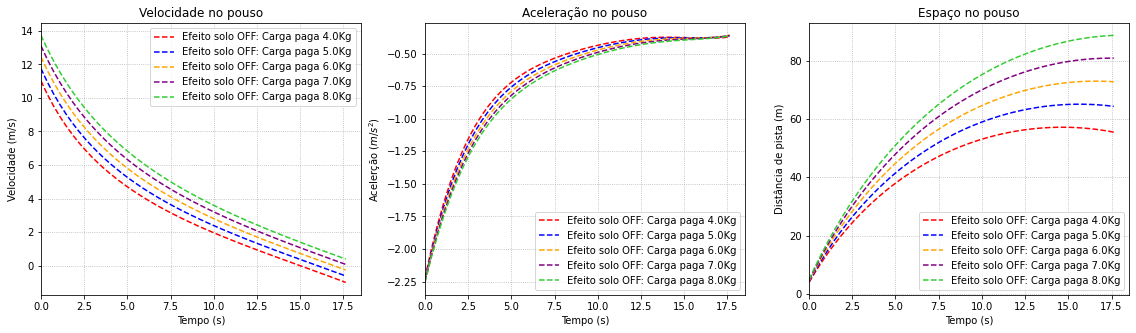

In [11]:
"""
Created on Sat Jun  5 09:09:02 2021

@author: Arthur Chabole
=============================
Performance cinemática do pouso.

"""
# Definindo domínio
t_final = 18
pesos = np.linspace(4, 9, 6)

# Colores e marcadores (beautilfy)
Cores = np.array(('red', 'blue', 'orange', 'purple', 'limegreen'))
Markers = np.array(('^', 'o', 'd', 'v', '.'))
Lines = np.array(('--', '-', '--', '--'))

# Gráficos
fig, ax = plt.subplots(figsize=(19.5, 5),nrows=1, ncols=3)


ax[0].set(title='Velocidade no pouso',
       xlabel='Tempo (s)', ylabel='Velocidade (m/s)')
ax[1].set(title='Aceleração no pouso', xlabel='Tempo (s)',
        ylabel='Acelerção $(m/s^2)$')
ax[2].set(title='Espaço no pouso', xlabel='Tempo (s)',
        ylabel='Distância de pista (m)')

'''ax4.set(title='Cinemática do pouso',
        xlabel='Tempo (s)', ylabel='Valores numéricos')'''

for (p, cor, mark) in zip(pesos, Cores, Markers):
    Zb = Airplane(Load=p)

    Zb.C_D0 = 0.1

    # Usando os métodos
    tempo, S_on, V_on, a_on = Zb.landing_Kinematic_EDO(
        t_final, Ground_Effect=True)
    
    tempo, S_off, V_off, a_off = Zb.landing_Kinematic_EDO(t_final)

    #Vlo_index = get_index_of_nearest_element(V_off, Zb.veloc_Req(Zb.CLmax)*1.2)

    #ax.plot(tempo, V_on, color= cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax[0].plot(tempo, V_off, '--', color=cor,
            label=f'Efeito solo OFF: Carga paga {p}Kg')
    #ax.axvline(x=tempo[Vlo_index], ymin= 0, ymax= 20, color= cor)

    #ax2.plot(tempo, a_on, color= cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax[1].plot(tempo, a_off, '--', color=cor,
             label=f'Efeito solo OFF: Carga paga {p}Kg')
    #ax2.axvline(x=tempo[Vlo_index], ymin=0, ymax= 8, color= cor)

    #ax3.plot(tempo, S_on, color= cor, label=f'Efeito solo ON: Carga paga {p}Kg')
    ax[2].plot(tempo, S_off, '--', color=cor,
             label=f'Efeito solo OFF: Carga paga {p}Kg')
    #ax3.axvline(x=tempo[Vlo_index], ymin= 0, ymax= 50, color= cor)

    '''ax4.plot(tempo, V_off, '--', marker=Markers[0], color=cor,
             label=f'Velocidade, Carga paga {p}Kg')
    ax4.plot(tempo, -a_off, '--', marker=Markers[1], color=cor,
             label=f'Aceleração')
    ax4.plot(tempo, S_off, '--', marker=Markers[2], color=cor,
             label=f'Espaço')'''

# Formatar gráfico 4 para escala logaritmica
#ax4.set_yscale('log')
#ax4.set_ylim(0.3)

# Beautilfy
for graf in ax:
    graf.legend()
    graf.set_xlim(0)
    graf.grid(linestyle='dotted')
    
plt.show()

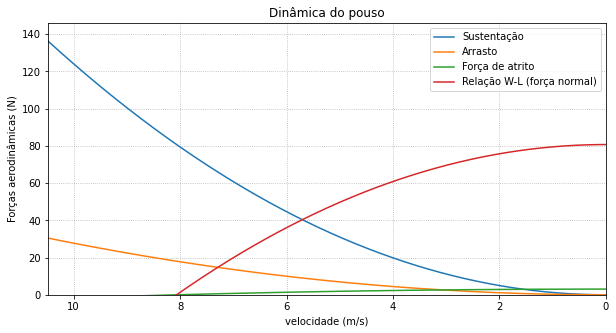

In [12]:
#Fazer a dinâmica do pouso
Zb = Airplane(CLn=1.75, CLmax=2.26, Load=5)

Vl, V, L, D, Fat = Zb.Landing_Forces()

fig, ax = plt.subplots(figsize=(10,5))
ax.set(title='Dinâmica do pouso', xlabel='velocidade (m/s)', ylabel='Forças aerodinâmicas (N)')

ax.plot(V, L, label='Sustentação')
ax.plot(V, D, label='Arrasto')
ax.plot(V, Fat, label='Força de atrito')
ax.plot(V, Fat/Zb.mi, label='Relação W-L (força normal)')

ax.set_xlim(Vl, 0) #Fica melhor se colocar em escala de logaritmo
ax.set_ylim(0)
ax.legend()
ax.grid(linestyle='dotted')

## Envelope de voo (dor de cabeça)

<ipython-input-13-b367883e218c>:50: RankWarning: Polyfit may be poorly conditioned
  p_min = zp.fit(V_min, altdens, 16)
<ipython-input-13-b367883e218c>:51: RankWarning: Polyfit may be poorly conditioned
  p_max = zp.fit(V_max, altdens, 16)
<ipython-input-13-b367883e218c>:53: RankWarning: Polyfit may be poorly conditioned
  p_Vstall = zp.fit(Vstall, altdens, 16)
<ipython-input-13-b367883e218c>:54: RankWarning: Polyfit may be poorly conditioned
  p_Vmaxstr = zp.fit(Vmaxstr, altdens, 16)


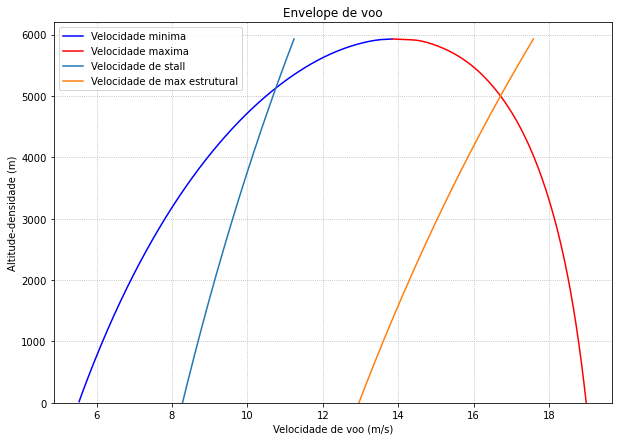

In [13]:
from ZebraLib.zebralib.zebraperformance import Airplane
from ZebraLib.zebralib import zebraperformance as zp
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.type_check import real
import pandas as pd
from scipy.optimize import fsolve
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import interp1d

Zb = Airplane(CLn=1.75, CLmax=2.26)
#Zb2 = Airplane(S=0.938, Af=0.8, CLmax= 1.523, CLn=1.061 )
Zb.C_D0 = 0.16

rho = np.linspace(0.595, 1.224978, 1000)
altdens = zp.iterate_rho2alt(rho)
V = np.linspace(0.1, 25, 1000)

V_min, V_max = np.empty_like(rho), np.empty_like(rho)
for i, dens in enumerate(rho):
    Td = Zb.trac_Dif(V, rho=dens)

    if i == 111:
        V_min[i] = 13.845
        V_max[i] = 13.845

    else:
        try:
            idx_min = (np.argwhere(np.diff(np.sign(Td))).flatten())[0]
            idx_max = (np.argwhere(np.diff(np.sign(Td))).flatten())[1]

            V_min[i] = V[idx_min]
            V_max[i] = V[idx_max]

        except:
            pass

# Corrigindo os dados iniciais
n = 111
V_min = np.split(V_min, [n])[1]
V_max = np.split(V_max, [n])[1]
altdens = np.split(altdens, [n])[1]
rho = np.split(rho, [n])[1]

# Velocidade max estrutural e stall
Vstall = np.array(Zb.veloc_Req(Zb.CLmax, rho))
Vmaxstr = np.array(Zb.veloc_StrutMax(rho))

# Aproximando para o polin�mio
p_min = zp.fit(V_min, altdens, 16)
p_max = zp.fit(V_max, altdens, 16)

p_Vstall = zp.fit(Vstall, altdens, 16)
p_Vmaxstr = zp.fit(Vmaxstr, altdens, 16)

# Plots
fig, ax = plt.subplots(figsize=(10,7))
ax.set(title='Envelope de voo', xlabel='Velocidade de voo (m/s)', ylabel='Altitude-densidade (m)')

# Domo de velocidade
ax.plot(V_min, p_min(V_min), 'b-', label='Velocidade minima')

#ax.plot(V_min, altdens, label='V min')
ax.plot(V_max, p_max(V_max), 'r-', label='Velocidade maxima')

#ax.plot(V_max, altdens, label='V max')

ax.plot(Vstall, p_Vstall(Vstall), label='Velocidade de stall')
ax.plot(Vmaxstr, p_Vmaxstr(Vmaxstr), label='Velocidade de max estrutural')

ax.legend()
ax.set_ylim(0, 6200)
ax.grid(linestyle='dotted')
plt.show()

## Previsão de tempo de missão

## Tempo de missão